In [3]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
neuro = pd.read_csv('neuro.csv')

In [5]:
neuro.head(5)

,Unnamed: 0,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005
1,1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006
2,2,5,6,3,1,"University of California, Berkeley",95457486.0,2002,2008
3,3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
4,4,7,10,16,2,"Washington University, Saint Louis",204465549.0,-1,-1


In [6]:
mentorship = pd.read_csv('/Users/yanmemgxing/Nutstore Files/scientific group/mentorship.csv')

In [7]:
mentorship.head(5)

,CID,MenteeID,MentorID,MentorshipType,Institution,InstitutionMAGID,StartYear,StopYear
0,2,2,3,1,"University of California, Berkeley",95457486.0,2000,2005
1,3,4,3,2,"University of California, Berkeley",95457486.0,2003,2006
2,5,6,3,1,"University of California, Berkeley",95457486.0,2002,2008
3,6,18761,9,1,"University of California, Berkeley",95457486.0,-1,1984
4,7,10,16,2,"Washington University, Saint Louis",204465549.0,-1,-1


In [8]:
mentors = set(mentorship.MentorID)

In [9]:
neuro_surviver = pd.DataFrame(neuro['MenteeID'][neuro.MenteeID.isin(mentors)].drop_duplicates())

In [10]:
neuro_surviver['surviver'] = 1

In [11]:
neuro_surviver.head(5)

,MenteeID,surviver
0,2,1
1,4,1
3,18761,1
4,10,1
5,3,1


In [12]:
neuro_mentees = neuro[['MenteeID','MentorID','StopYear']]

In [13]:
neuro_mentees.head(3)

,MenteeID,MentorID,StopYear
0,2,3,2005
1,4,3,2006
2,6,3,2008


In [14]:
neuro_mentees_surviver_0 = neuro_mentees.merge(neuro_surviver,on='MenteeID',how='left')

In [15]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver
0,2,3,2005,1.0
1,4,3,2006,1.0
2,6,3,2008,NaN
3,18761,9,1984,1.0
4,10,16,-1,1.0


In [16]:
SR = []
for year in range(1960,2010):
    neuro_mentees_surviver = neuro_mentees_surviver_0[neuro_mentees_surviver_0.StopYear==year]
    sr = len(set(neuro_mentees_surviver['MenteeID'][neuro_mentees_surviver.surviver==1]))/len(set(neuro_mentees_surviver['MenteeID']))
    SR.append((year,sr))

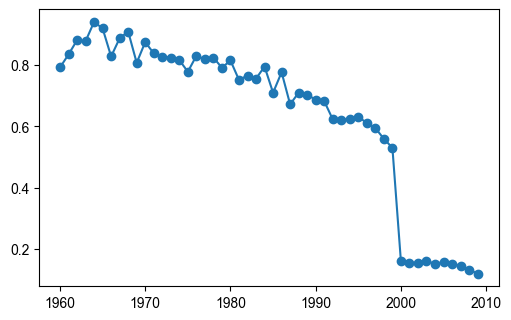

In [17]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')
x = [k[0] for k in SR]
y = [k[1] for k in SR]
ax.plot(x,y,marker='o')


##### Surviver in Pubs.

In [18]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver
0,2,3,2005,1.0
1,4,3,2006,1.0
2,6,3,2008,NaN
3,18761,9,1984,1.0
4,10,16,-1,1.0


In [19]:
pid_mag_openalex = pd.read_csv('pid_mag_openalex.csv')

In [20]:
pid_mag_openalex = pid_mag_openalex.rename(columns={'PID':'MenteeID'})

In [21]:
pid_mag_openalex.head(5)

,MenteeID,MAGAuthorID,author_id
0,1,2.171828e+09,A2171827615
1,2,2.082173e+09,A2082172561
2,3,2.110166e+09,A2110165986
3,4,2.183264e+09,A2183263527
4,5,2.156587e+09,A2156586888


In [22]:
neuro_mentees_surviver_0 = neuro_mentees_surviver_0.merge(pid_mag_openalex,on='MenteeID',how='left')

In [23]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver,MAGAuthorID,author_id
0,2,3,2005,1.0,2.082173e+09,A2082172561
1,4,3,2006,1.0,2.183264e+09,A2183263527
2,6,3,2008,NaN,2.607431e+09,A2607431256
3,18761,9,1984,1.0,2.809701e+09,A2809701389
4,10,16,-1,1.0,NaN,NaN


In [24]:
surviver_with_OpenALexID = neuro_mentees_surviver_0[['MenteeID','StopYear','author_id']][(neuro_mentees_surviver_0.surviver==1)
                                                                                        &(~neuro_mentees_surviver_0.author_id.isnull())
                                                                                        &(neuro_mentees_surviver_0.StopYear>-1)]

In [25]:
surviver_with_OpenALexID.head(5)

,MenteeID,StopYear,author_id
0,2,2005,A2082172561
1,4,2006,A2183263527
3,18761,1984,A2809701389
18,5,2009,A2156586888
29,44,1985,A2194378655


In [26]:
career_span = pd.read_csv('all_AFT_mentee_career_span.csv')

In [27]:
career_span.head(5)

,author_id,first_pub_year,last_pub_year,career_len
0,A101120317,2004,2007,3
1,A1012905225,1997,2022,25
2,A1016505059,1995,2022,27
3,A102140478,2006,2008,2
4,A102503536,1987,2022,35


In [28]:
surviver_with_OpenALexID = surviver_with_OpenALexID.merge(career_span,on='author_id',how='left')

In [29]:
surviver_with_OpenALexID.sample(5)

,MenteeID,StopYear,author_id,first_pub_year,last_pub_year,career_len
6382,25317,2008,A2139717864,2003,2022,19
8640,51973,2010,A3012515580,2011,2021,10
14266,47413,2002,A255454533,2002,2021,19
13274,51910,2003,A148951416,1998,2022,24
8101,12482,2013,A2105054212,2009,2022,13


In [30]:
surviver_careerLen = surviver_with_OpenALexID[['StopYear','career_len']][~surviver_with_OpenALexID.career_len.isnull()]

In [31]:
surviver_careerLen.head(5)

,StopYear,career_len
0,2005,20
1,2006,14
2,1984,36
3,2009,15
4,1985,36


In [32]:
surviver_careerLen = surviver_careerLen[surviver_careerLen.StopYear<2000]

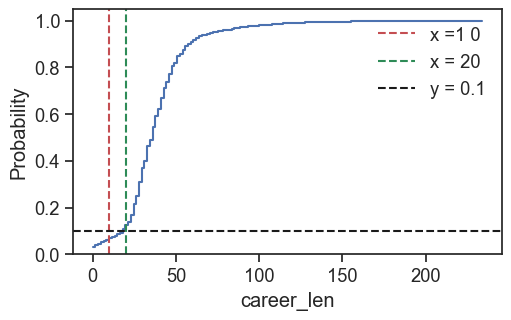

In [33]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.histplot(data=surviver_careerLen, x="career_len",stat='probability',cumulative=1,fill=0,element="step",
             ax=ax)
ax.axvline(x=10,color='r',ls='--',label='x =1 0')
ax.axvline(x=20,color='seagreen',ls='--',label='x = 20')
ax.axhline(y=0.1,color='k',ls='--',label='y = 0.1')
plt.legend(frameon=0,loc=1)

##### dropout

In [34]:
dropout_with_OpenALexID = neuro_mentees_surviver_0[['MenteeID','StopYear','author_id']][(neuro_mentees_surviver_0.surviver.isnull())
                                                                                        &(~neuro_mentees_surviver_0.author_id.isnull())
                                                                                        &(neuro_mentees_surviver_0.StopYear>-1)]

In [35]:
dropout_with_OpenALexID = dropout_with_OpenALexID.merge(career_span,on='author_id',how='left')

In [36]:
dropout_with_OpenALexID.head(5)

,MenteeID,StopYear,author_id,first_pub_year,last_pub_year,career_len
0,6,2008,A2607431256,2009.0,2021.0,12.0
1,8,2006,A2792709984,2004.0,2008.0,4.0
2,17,2002,A1964588873,1993.0,2008.0,15.0
3,17,2010,A1964588873,1993.0,2008.0,15.0
4,60,2007,A2259686655,2003.0,2003.0,0.0


In [37]:
dropout_careerLen = dropout_with_OpenALexID[['StopYear','career_len']][~dropout_with_OpenALexID.career_len.isnull()]

In [38]:
dropout_careerLen = dropout_careerLen[dropout_careerLen.StopYear<2000]

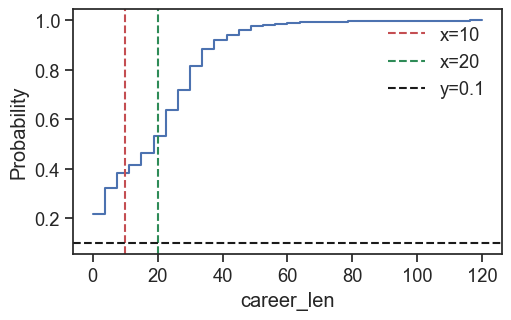

In [39]:
fig, ax = plt.subplots(1,1,constrained_layout=True,figsize=[1*5,0.618*5])
sns.set(style='ticks',font_scale=1.2, font='Arial')

sns.histplot(data=dropout_careerLen, x="career_len",stat='probability',cumulative=1,element='step',fill=0,
             ax=ax)
ax.axvline(x=10,color='r',ls='--',label='x=10')
ax.axvline(x=20,color='seagreen',ls='--',label='x=20')
ax.axhline(y=0.1,color='k',ls='--',label='y=0.1')
plt.legend(frameon=0,loc=1)

#### Survival Rate calcuated by Pub.

In [40]:
neuro_mentees_surviver_0.head(5)

,MenteeID,MentorID,StopYear,surviver,MAGAuthorID,author_id
0,2,3,2005,1.0,2.082173e+09,A2082172561
1,4,3,2006,1.0,2.183264e+09,A2183263527
2,6,3,2008,NaN,2.607431e+09,A2607431256
3,18761,9,1984,1.0,2.809701e+09,A2809701389
4,10,16,-1,1.0,NaN,NaN


In [41]:
career_span.head(5)

,author_id,first_pub_year,last_pub_year,career_len
0,A101120317,2004,2007,3
1,A1012905225,1997,2022,25
2,A1016505059,1995,2022,27
3,A102140478,2006,2008,2
4,A102503536,1987,2022,35


In [67]:
neuro_mentees_info = neuro_mentees_surviver_0.merge(career_span,on='author_id',how='left')

In [68]:
# neuro_mentees_info = neuro_mentees_info[~neuro_mentees_info.author_id.isnull()]

In [77]:
neuro_mentees_info.head(5)

,MenteeID,MentorID,StopYear,surviver,MAGAuthorID,author_id,first_pub_year,last_pub_year,career_len
0,2,3,2005,1.0,2.082173e+09,A2082172561,2002.0,2022.0,20.0
1,4,3,2006,1.0,2.183264e+09,A2183263527,2004.0,2018.0,14.0
2,6,3,2008,NaN,2.607431e+09,A2607431256,2009.0,2021.0,12.0
3,18761,9,1984,1.0,2.809701e+09,A2809701389,1986.0,2022.0,36.0
5,3,16,-1,1.0,2.110166e+09,A2110165986,1990.0,2022.0,32.0


In [78]:
dropout_temp = neuro_mentees_info[neuro_mentees_info.surviver.isnull()]

In [84]:
switch = 1

if switch==1:
    def survival_rate(df):
        try:
            survival_5 = len(df[df.career_len>5])/len(df[df.career_len>0])
            survival_10 = len(df[df.career_len>10])/len(df[df.career_len>0])
            survival_15 = len(df[df.career_len>15])/len(df[df.career_len>0])
            survival_20 = len(df[df.career_len>20])/len(df[df.career_len>0])
        except:
            survival_5 = 0
            survival_10 = 0
            survival_15 = 0
            survival_20 = 0
        return [survival_5 ,survival_10 ,survival_15,survival_20]
    
else:
    def survival_rate(df):
        try:
            survival_5 = len(df[df.career_len>5])/len(df)
            survival_10 = len(df[df.career_len>10])/len(df)
            survival_15 = len(df[df.career_len>15])/len(df)
            survival_20 = len(df[df.career_len>20])/len(df)
        except:
            survival_5 = 0
            survival_10 = 0
            survival_15 = 0 
            survival_20 = 0
        
        return [survival_5 ,survival_10 ,survival_15,survival_20]


In [85]:
upbondary = max(neuro_mentees_info.first_pub_year)
print(upbondary )
neuro_mentees_info = neuro_mentees_info[neuro_mentees_info.first_pub_year<upbondary]

2020.0


In [86]:
survival_info = neuro_mentees_info.groupby('first_pub_year').apply(survival_rate).reset_index(name='survival rate')

data = survival_info[(survival_info.first_pub_year>1960)&
             (survival_info.first_pub_year<2005)]

In [87]:
x = list(data.first_pub_year)
temp = list(data['survival rate'])

y5 = [k[0] for k in temp]
y10 = [k[1] for k in temp]
y15 = [k[2] for k in temp]
y20 = [k[3] for k in temp]

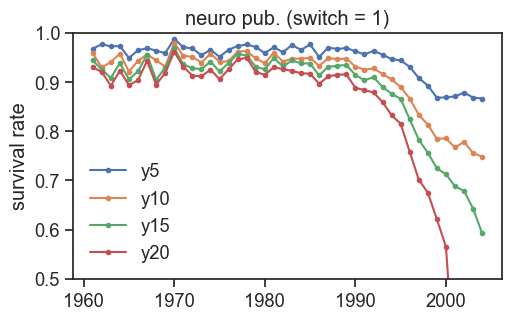

In [88]:
fig, ax = plt.subplots(constrained_layout=True,figsize=[1*5,0.618*5])

# plot
ax.plot(x, y5, label=f'y5', marker='.')
ax.plot(x, y10, label=f'y10', marker='.')
ax.plot(x, y15, label=f'y15', marker='.')
ax.plot(x, y20, label=f'y20', marker='.')

ax.set(ylabel='survival rate',title=f'neuro pub. (switch = {switch})',
      ylim=[0.5,1])

plt.legend(frameon=0)

fig.savefig(f'/Users/yanmemgxing/Desktop/neuro pub. (switch = {switch}).png',dpi=100)